In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [37]:
from numpy import r_, pi, sin, cos

In [14]:
from scipy import signal
from scipy import misc

In [50]:
plt.rcParams['figure.figsize'] = (10, 10)

In [90]:
fontdict = {'fontsize': 30,
 'fontweight' : plt.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}

In [51]:
einstein = plt.imread('einstein.png')[:,:,0].astype(float)[:256, :256]

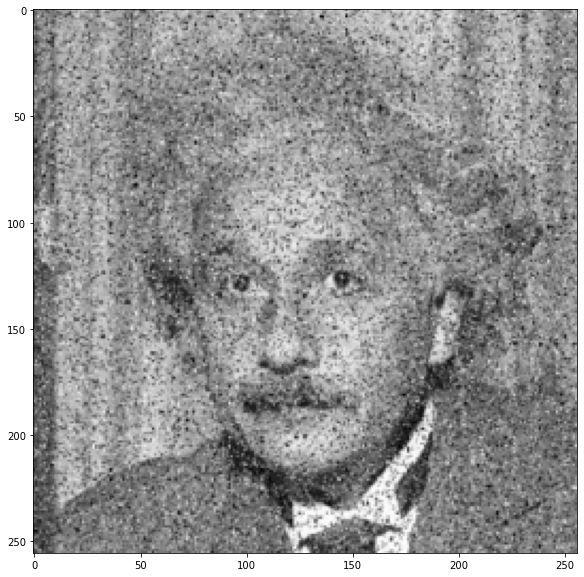

In [53]:
plt.imshow(einstein, cmap = 'gray')
plt.show()

## DCT coefficients and The DCT

In [116]:
# 2d-dct of images 
def dct2(a):
    return scipy.fft.dct( scipy.fft.dct( a, axis = 0, norm = 'ortho'), axis = 1, norm = 'ortho')

def idct2(a):
    return scipy.fft.idct( scipy.fft.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [34]:
im = einstein
imsize = im.shape
dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:i+8, j:j+8] = dct2(im[i:i+8, j:j+8])

display an 8x8 block

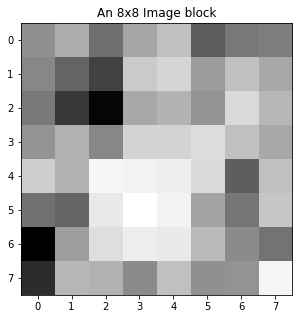

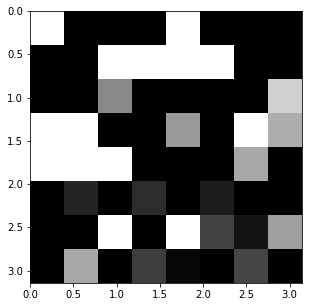

In [38]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])

Text(0.5, 1.0, '8x8 DCTs of the image')

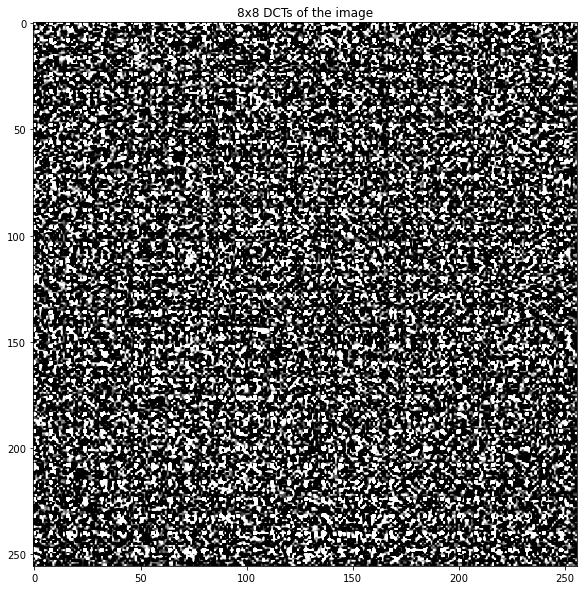

In [69]:
# Display entire DCT
plt.figure()
plt.imshow(dct, cmap='gray', vmax = np.max(dct)*0.01, vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 4.174805% of the DCT coefficients


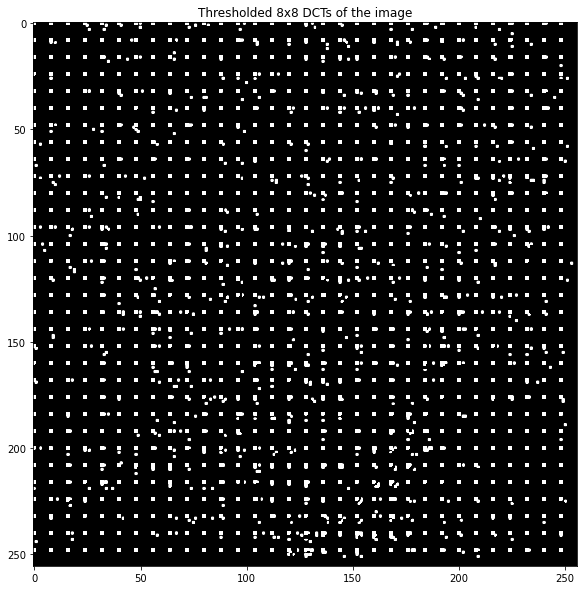

In [68]:
# Threshold
thresh = 0.036
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

above_thresh_dct = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print(f"Keeping only %f%% of the DCT coefficients" % (above_thresh_dct*100.0))

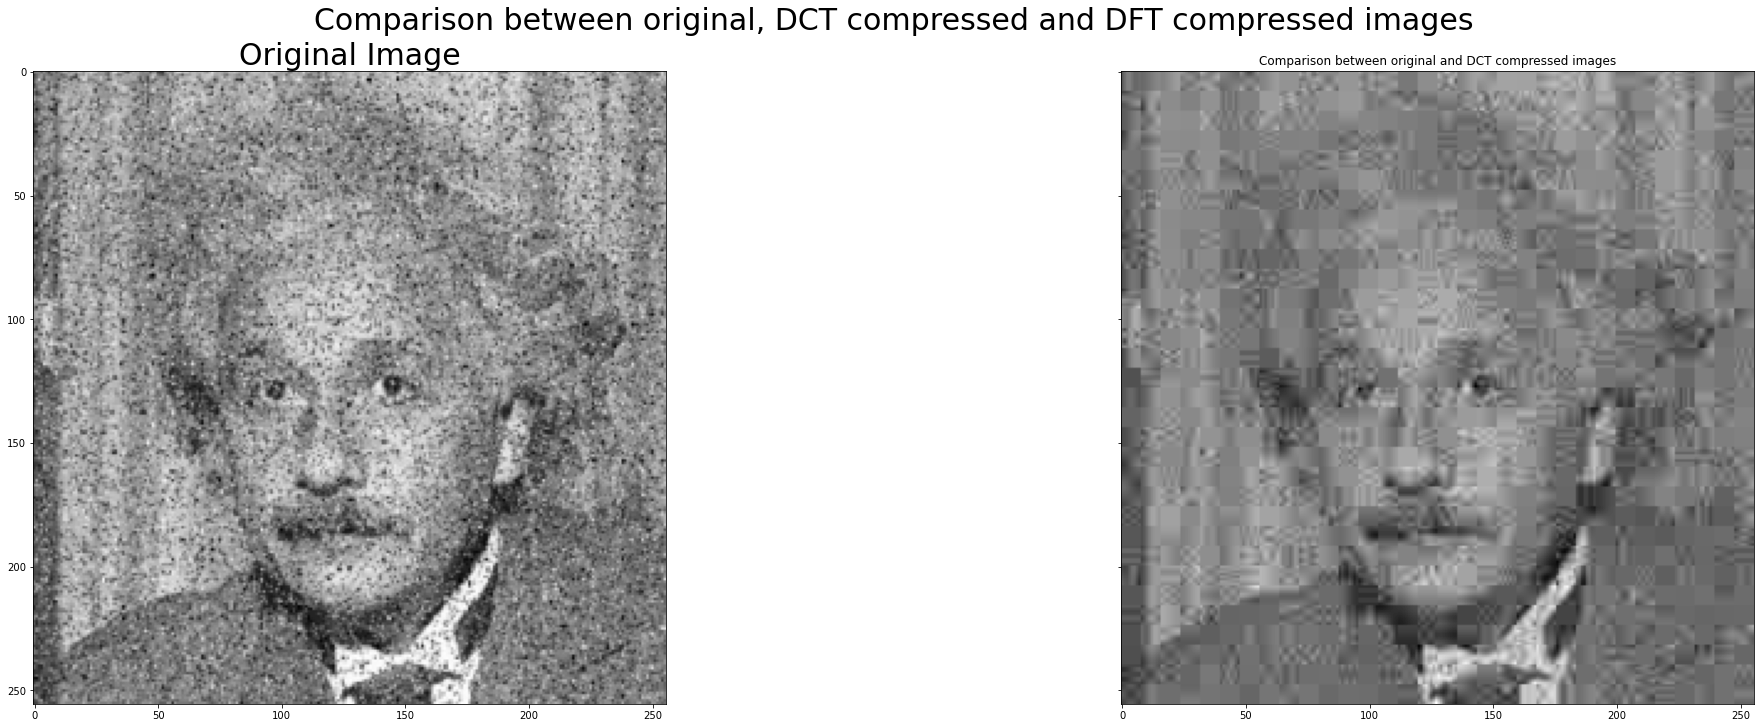

In [107]:
idct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        idct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)] )
        
fig, ax = plt.subplots(1, 2, constrained_layout=True, sharey=True, figsize = (30,10))

fig.suptitle('Comparison between original, DCT compressed and DFT compressed images', fontsize=30);

ax[0].imshow(im, cmap = 'gray');
ax[0].set_title("Original Image", fontdict = fontdict);

ax[1].imshow(idct, cmap = 'gray');
ax[1].set_title("DCT Compressed", fontdict = fontdict);

plt.title("Comparison between original and DCT compressed images" );

## Comparison with DFT and DCT 

In [103]:
dft = np.zeros(imsize, dtype = 'complex')
idft = np.zeros(imsize, dtype = 'complex')

# 8x8
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft2(im[i:(i+8),j:(j+8)])

In [104]:
thresh = 0.036
dft_thresh = dft * (abs(dft) > (thresh*np.max(np.abs(dft))))

above_thresh_dft = np.sum( dft_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

# 8x8 iDFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        idft[i:(i+8),j:(j+8)] = np.fft.ifft2( dft_thresh[i:(i+8),j:(j+8)] )

Keeping only 4.174805% of the DCT coefficients
Keeping only 3.511047% of the DFT coefficients


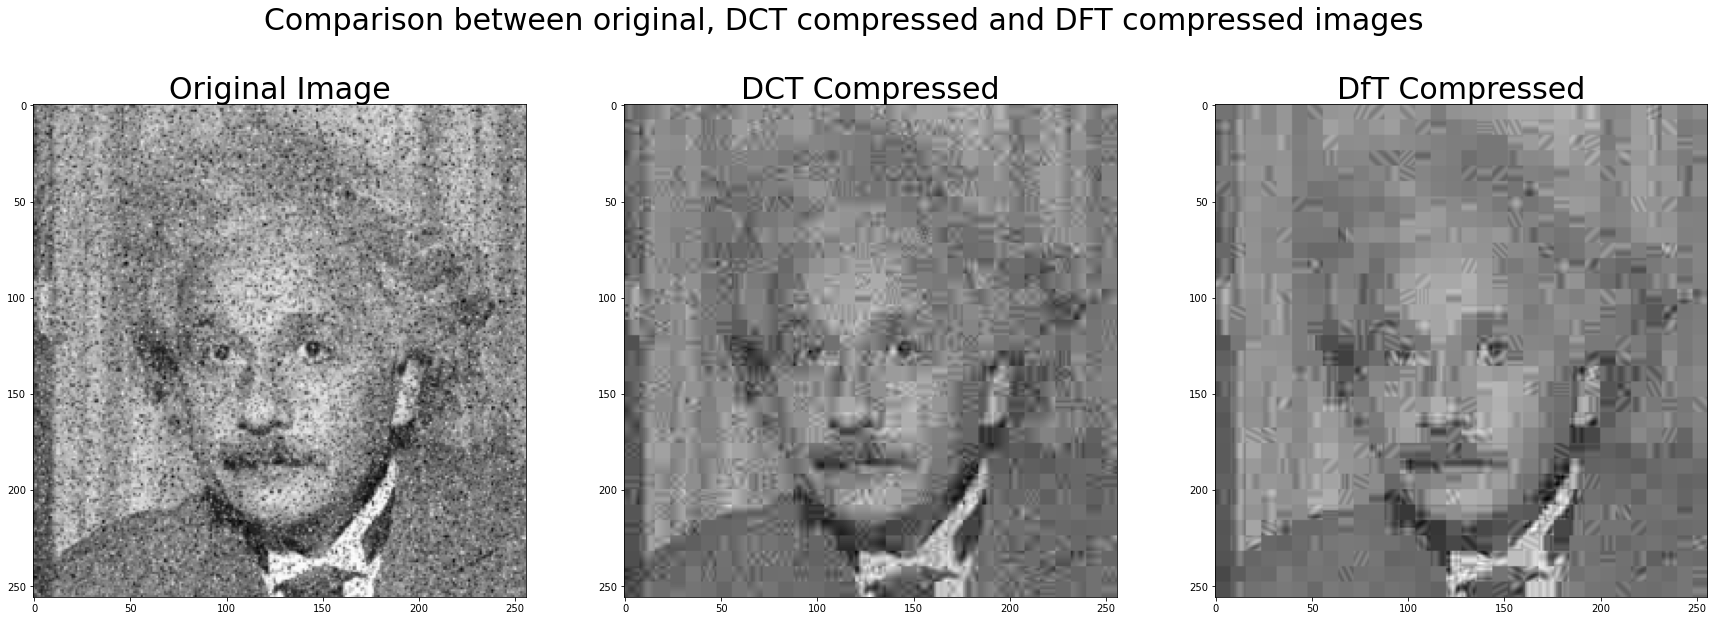

In [105]:
fig, ax = plt.subplots(1,3, figsize = (30,10))

fig.suptitle('Comparison between original, DCT compressed and DFT compressed images', fontsize=30);

ax[0].imshow(im, cmap = 'gray');
ax[0].set_title("Original Image", fontdict = fontdict);

ax[1].imshow(im_dct, cmap = 'gray');
ax[1].set_title("DCT Compressed", fontdict = fontdict);

ax[2].imshow(abs(idft), cmap = 'gray');
ax[2].set_title("DfT Compressed", fontdict = fontdict);

print(f"Keeping only %f%% of the DCT coefficients" % (above_thresh_dct*100.0)) 
print(f"Keeping only %f%% of the DFT coefficients" % (above_thresh_dft*100.0)) 

plt.show()

In [123]:
IM = np.floor(np.random.rand(8,8)*256)
IM

array([[ 87., 245., 165., 217.,  42., 223., 125.,   1.],
       [ 73., 171.,  83.,  70.,  80., 253.,  27., 159.],
       [204., 156., 143., 151., 187., 186.,  86.,  25.],
       [ 79., 142., 119.,  69., 102.,  18.,  54.,  21.],
       [166., 243., 154., 219., 192., 253., 157., 203.],
       [216., 161.,  12., 189., 108.,  72., 244.,  25.],
       [ 10., 177., 132., 120.,  99., 207., 173., 228.],
       [  2., 193., 164., 236., 205.,  82., 196., 102.]])

In [124]:
DCT_IM = dct2(IM)
DCT_IM

array([[1087.875     ,   52.47667248,  -92.66199231,   26.72433803,
        -116.125     ,  -40.16733601,  -92.72290133, -131.03494275],
       [ -69.8095408 ,  120.1535049 ,   -5.81833166,   83.2462651 ,
         -50.30850665,  -36.96087216,  131.69622298,  -74.34389294],
       [   8.38421505,  -65.11756795,  -67.54155397,  -77.82921944,
         -96.30963356,   -6.16051925,   -8.84385367,  -67.30535998],
       [  74.20536354,  -12.27682416,   69.5176013 ,   39.27993954,
         -37.31444792,   76.81640338,  -41.20712359,  -99.18593756],
       [  31.125     ,   54.39758352,  -86.23398055,  -93.03874248,
         -31.375     ,    1.22227952,  -49.11320442,   12.64965759],
       [-108.14610544,   32.13442236,    2.13077329,  -38.26901323,
         -52.36869781,   33.06105072,   -7.76851709,   36.88181576],
       [  23.18105235,  138.82466267,  -57.09385367,   85.10940561,
          42.19283983,  156.65014344, -121.45844603,   54.83211775],
       [ 206.74996835,  -40.92930955,  -3